**DATASET DESCRIPTION**
*   id - the Spotify ID for the track.
*   artist_names - the name of the artist.
*   track_name - the name of the track.
*   source - the name of the record label.
*   key - the key the track is in.
*   mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
*   time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7.
*   danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
*    energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
*   speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
*   acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
*   instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
*   liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
*   valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
*   loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
*   tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
*   duration_ms - the duration of the track in milliseconds.
*   weeks_on_chart - Number of weeks the track was in the top 200 charts.
*   streams - How many streams the track had during its period in the charts.









In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spotify_top_songs_audio_features.csv")

In [3]:
df.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


In [4]:
df.shape

(6513, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6513 non-null   object 
 1   artist_names      6513 non-null   object 
 2   track_name        6513 non-null   object 
 3   source            6513 non-null   object 
 4   key               6513 non-null   object 
 5   mode              6513 non-null   object 
 6   time_signature    6513 non-null   object 
 7   danceability      6513 non-null   float64
 8   energy            6513 non-null   float64
 9   speechiness       6513 non-null   float64
 10  acousticness      6513 non-null   float64
 11  instrumentalness  6513 non-null   float64
 12  liveness          6513 non-null   float64
 13  valence           6513 non-null   float64
 14  loudness          6513 non-null   float64
 15  tempo             6513 non-null   float64
 16  duration_ms       6513 non-null   int64  


In [6]:
df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
count,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6513.000000,6.513000e+03
mean,0.681731,0.636522,0.121933,0.236761,0.012469,0.180168,0.492412,-6.350667,122.117244,202566.684170,13.614924,1.089647e+08
std,0.141787,0.164813,0.113441,0.244784,0.075151,0.138054,0.227001,2.536114,29.416097,49199.592333,24.084051,2.276695e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,30133.000000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044400,0.000000,0.097400,0.316000,-7.564000,98.007000,173038.000000,1.000000,8.695060e+06
50%,0.698000,0.651000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.983000,120.034000,198367.000000,4.000000,2.712856e+07
75%,0.785000,0.759000,0.163000,0.356000,0.000041,0.219000,0.669000,-4.673000,142.025000,226003.000000,16.000000,9.951456e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,1.509000,212.117000,690732.000000,367.000000,3.528450e+09


In [7]:
df.isnull().sum()

id                  0
artist_names        0
track_name          0
source              0
key                 0
mode                0
time_signature      0
danceability        0
energy              0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
loudness            0
tempo               0
duration_ms         0
weeks_on_chart      0
streams             0
dtype: int64

In [8]:
df.nunique()

id                  6513
artist_names        3001
track_name          5351
source               967
key                   12
mode                   2
time_signature         4
danceability         686
energy               805
speechiness         1146
acousticness        2020
instrumentalness    1833
liveness            1071
valence             1013
loudness            4255
tempo               5353
duration_ms         5460
weeks_on_chart       159
streams             6513
dtype: int64

<ipython-input-9-c03f62a9e36c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


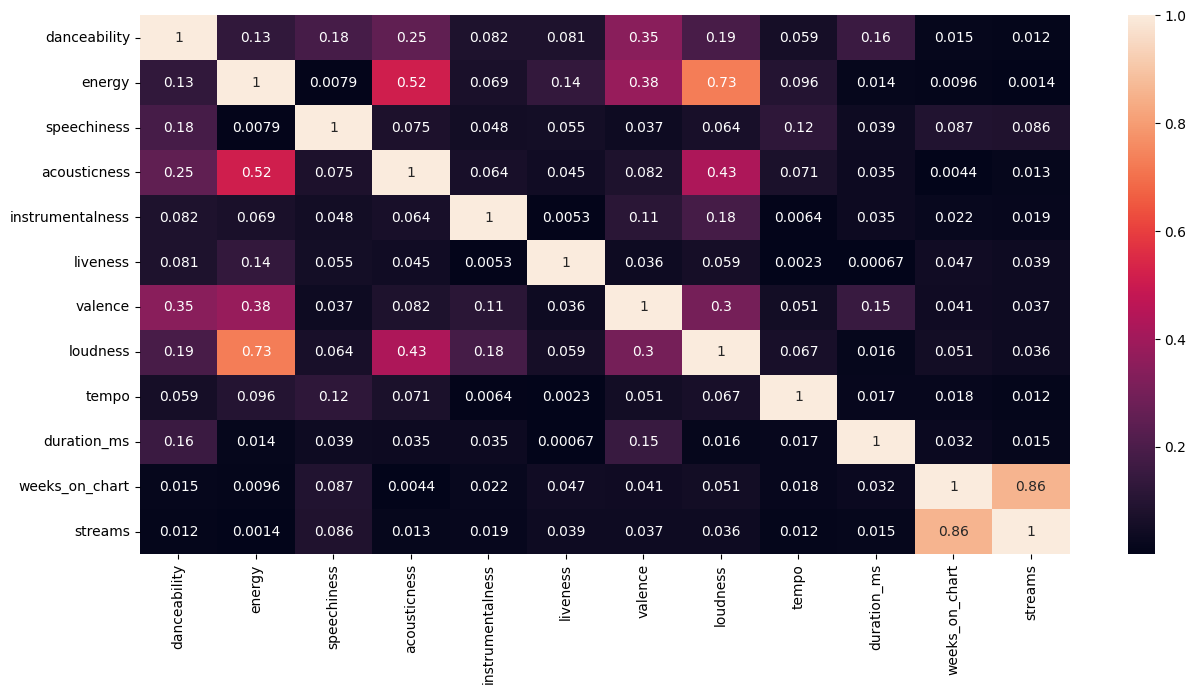

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

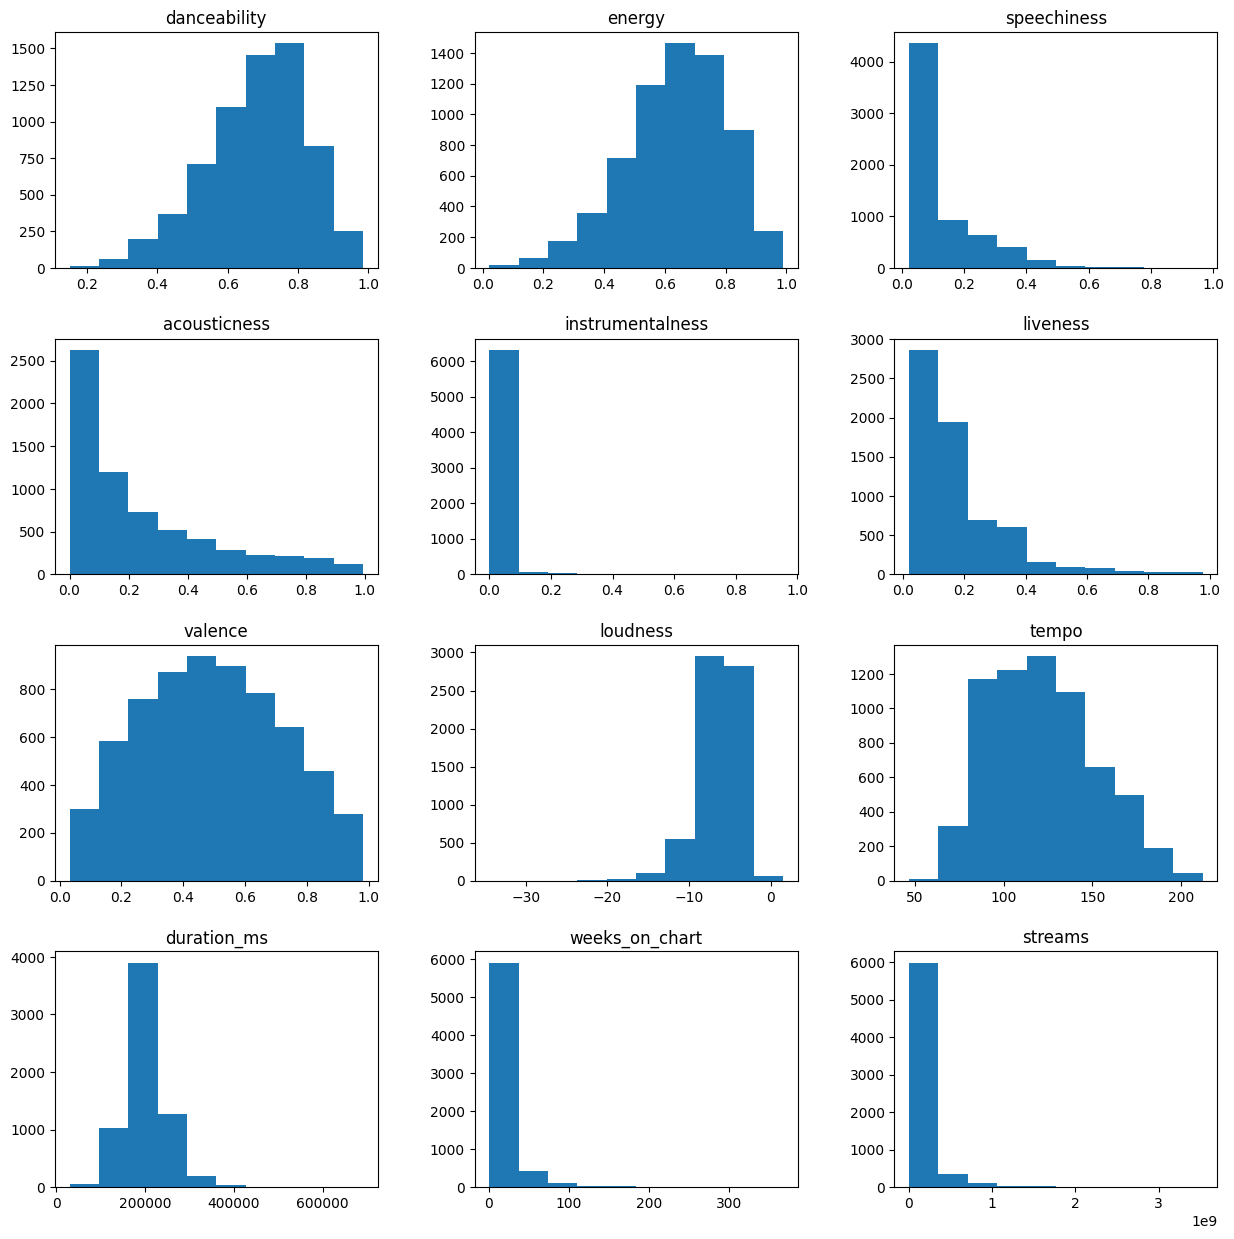

In [10]:
df.hist(figsize=(15, 15), grid=False)
plt.show()

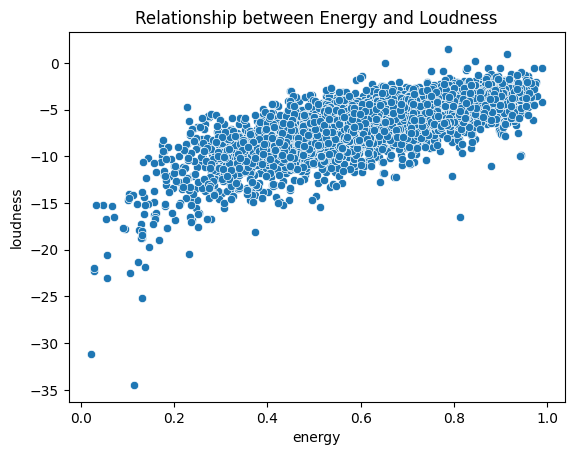

In [11]:
sns.scatterplot(data=df, x='energy', y='loudness')
plt.title('Relationship between Energy and Loudness')
plt.show()

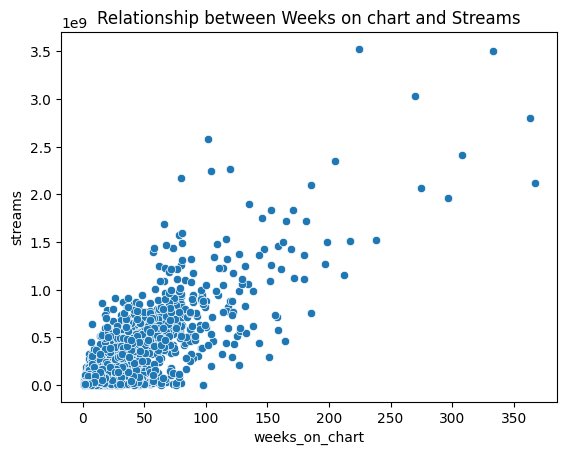

In [12]:
sns.scatterplot(data=df, x='weeks_on_chart', y='streams')
plt.title('Relationship between Weeks on chart and Streams')
plt.show()

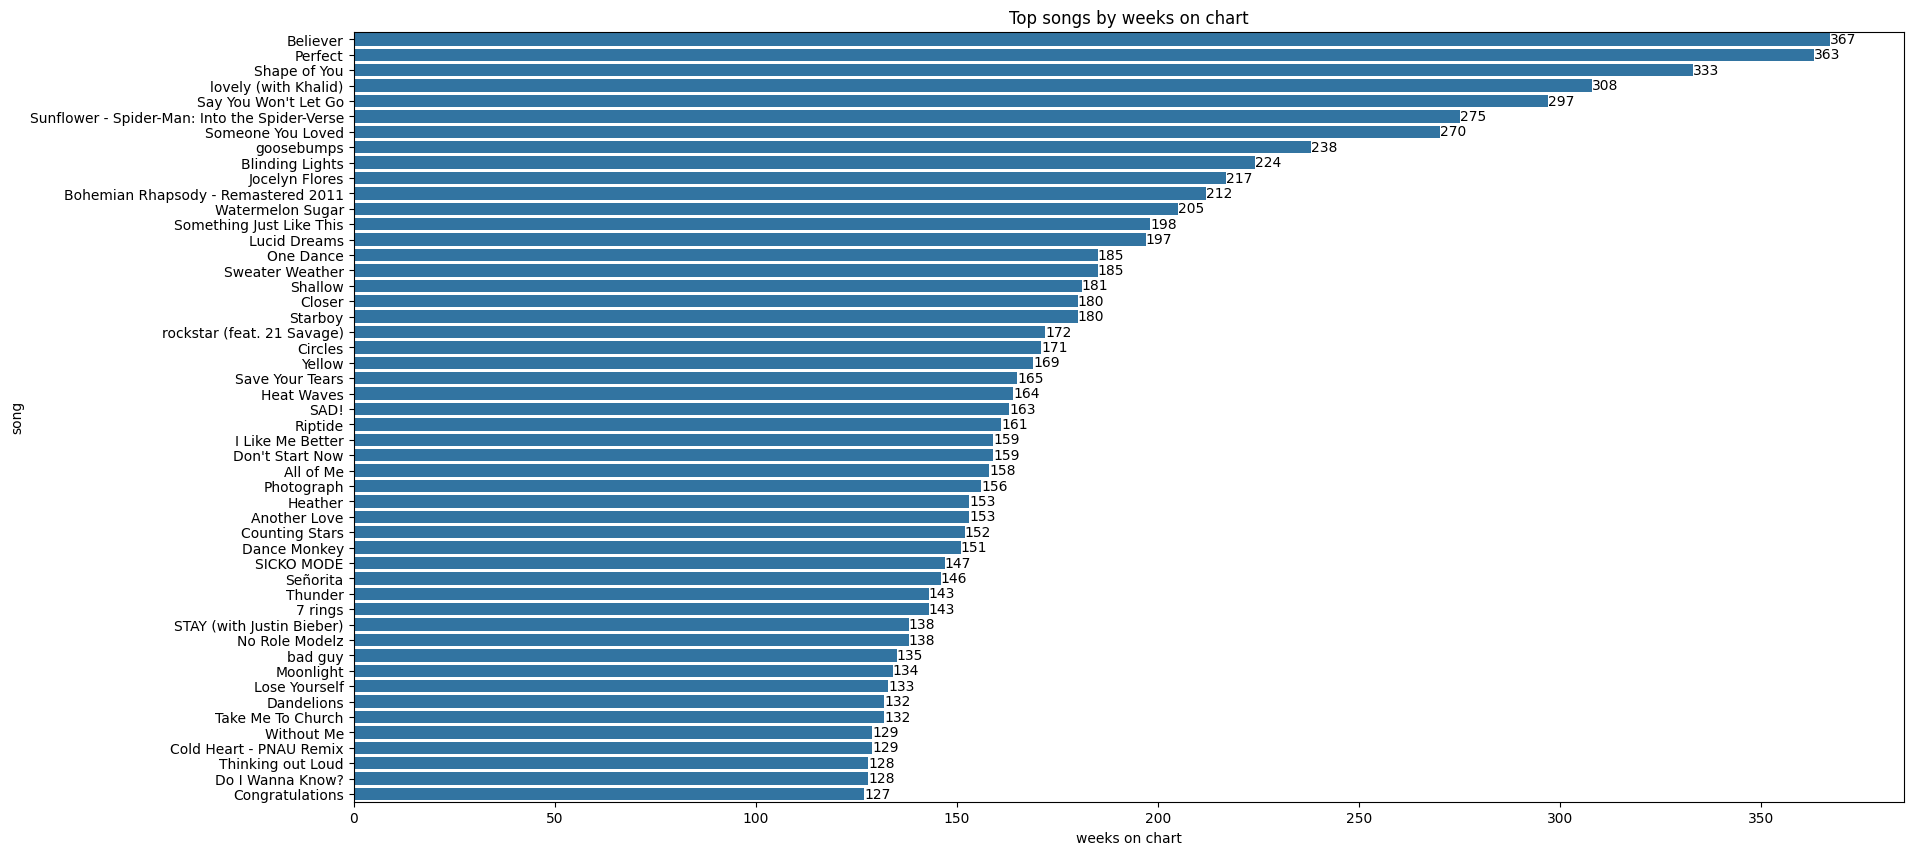

In [13]:
plt.subplots(figsize=(20, 10))
top_charts = df.sort_values(by='weeks_on_chart', ascending=False).head(50)
ax = sns.barplot(x='weeks_on_chart', y='track_name', data=top_charts)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Top songs by weeks on chart')
plt.xlabel('weeks on chart')
plt.ylabel('song')
plt.show()

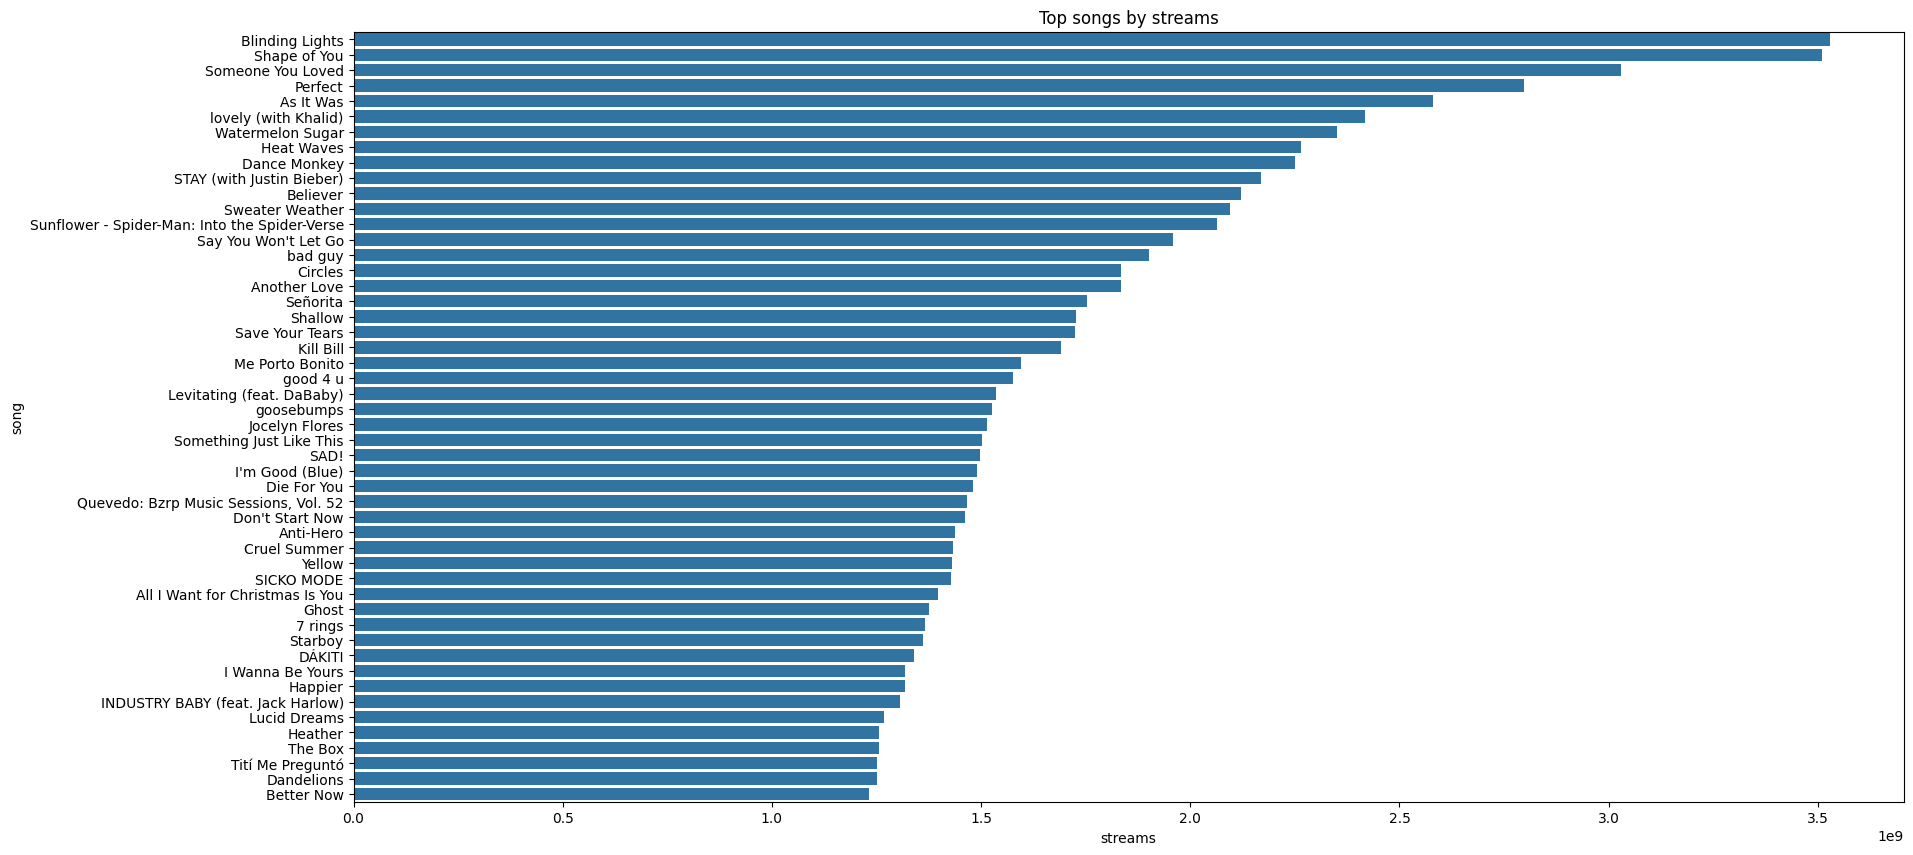

In [14]:
plt.subplots(figsize=(20, 10))
top_streams = df.sort_values(by='streams', ascending=False).head(50)
sns.barplot(x='streams', y='track_name', data=top_streams)
plt.title('Top songs by streams')
plt.xlabel('streams')
plt.ylabel('song')
plt.show()

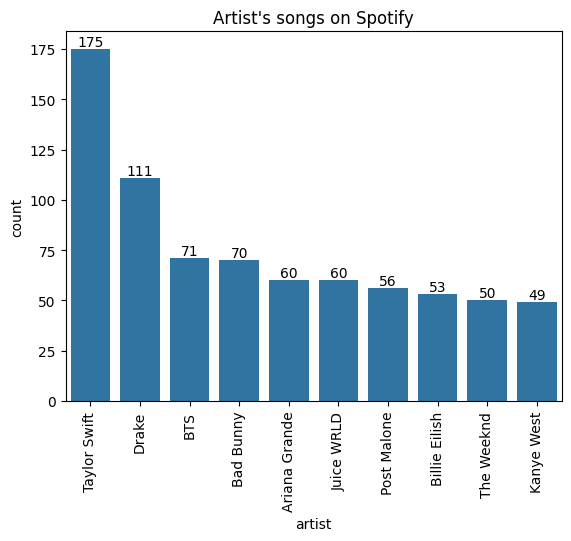

In [15]:
artists = df['artist_names'].value_counts()
ax = sns.barplot(data=artists.head(10))
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Artist's songs on Spotify")
plt.xlabel('artist')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

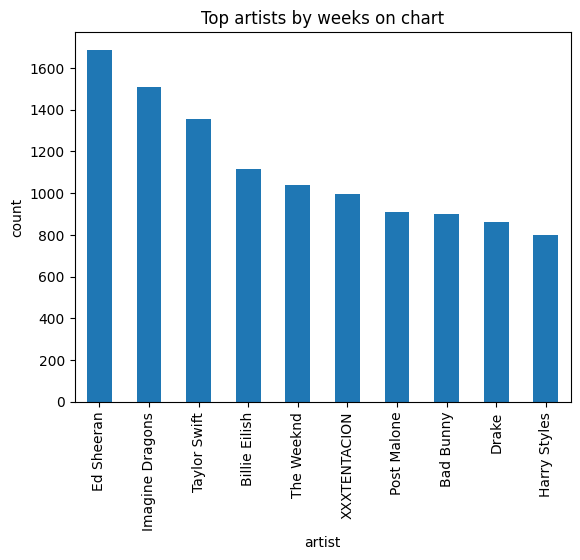

In [16]:
df.groupby('artist_names')['weeks_on_chart'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top artists by weeks on chart')
plt.xlabel('artist')
plt.ylabel('count')
plt.show()

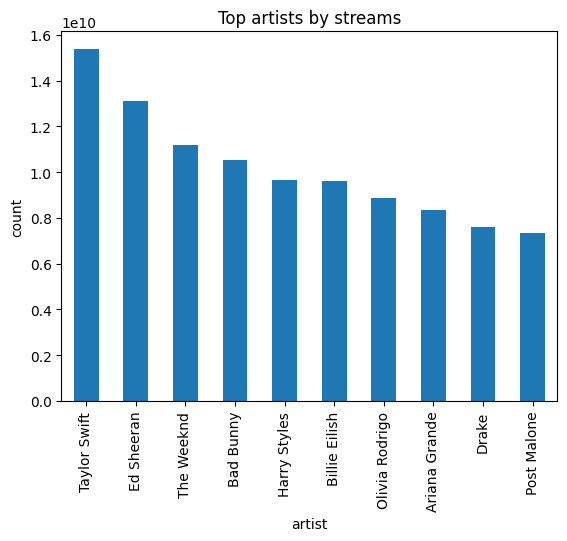

In [17]:
df.groupby('artist_names')['streams'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top artists by streams')
plt.xlabel('artist')
plt.ylabel('count')
plt.show()

In [18]:
df[df.artist_names == 'Taylor Swift'].sort_values(by='weeks_on_chart', ascending=False).head(1)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
1564,1u8c2t2Cy7UBoG4ArRcF5g,Taylor Swift,Blank Space,"Big Machine Records, LLC",F,Major,4 beats,0.76,0.703,0.054,0.103,0.0,0.0913,0.57,-5.412,95.997,231827,108,984205801


In [19]:
df[df.artist_names == 'Taylor Swift'].sort_values(by='streams', ascending=False).head(1)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
423,0V3wPSX9ygBnCm8psDIegu,Taylor Swift,Anti-Hero,Taylor Swift,E,Major,4 beats,0.637,0.643,0.0519,0.13,0.000002,0.142,0.533,-6.571,97.008,200690,73,1438562340


In [20]:
df[df.artist_names == 'Ed Sheeran'].sort_values(by='weeks_on_chart', ascending=False).head(1)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
748,0tgVpDi06FyKpA1z0VMD4v,Ed Sheeran,Perfect,Atlantic Records UK,G#/Ab,Major,3 beats,0.599,0.448,0.0232,0.163,0.0,0.106,0.168,-6.312,95.05,263400,363,2797600939


In [21]:
df[df.artist_names == 'Ed Sheeran'].sort_values(by='streams', ascending=False).head(1)

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
6383,7qiZfU4dY1lWllzX7mPBI3,Ed Sheeran,Shape of You,Atlantic Records UK,C#/Db,Minor,4 beats,0.825,0.652,0.0802,0.581,0.0,0.0931,0.931,-3.183,95.977,233713,333,3509169565


Top songs by different categories

In [22]:
# Most danceable songs
df[['artist_names', 'track_name', 'danceability']].sort_values(by='danceability', ascending=False).head(3)

,artist_names,track_name,danceability
700,MC Rogerinho,Botadinha Saliente,0.985
5333,347aidan,Dancing in My Room,0.980
1062,"Young Thug, Lil Baby",Bad Bad Bad (feat. Lil Baby),0.974


In [23]:
# Most energetic songs
df[['artist_names', 'track_name', 'energy']].sort_values(by='energy', ascending=False).head(3)

,artist_names,track_name,energy
2380,"Shouse, David Guetta",Love Tonight (David Guetta Remix Edit),0.989
6434,"El Alfa, Peso Pluma",PLEBADA,0.988
3801,Linkin Park,Faint,0.978


In [24]:
# Songs with a lot of words
df[['artist_names', 'track_name', 'speechiness']].sort_values(by='speechiness', ascending=False).head(3)

,artist_names,track_name,speechiness
419,Paul Rosenberg,Paul - Skit,0.966
425,XXXTENTACION,The Explanation,0.954
3013,Lil Wayne,I Love You Dwayne,0.941


In [25]:
# Most acoustic songs
df[['artist_names', 'track_name', 'acousticness']].sort_values(by='acousticness', ascending=False).head(3)

,artist_names,track_name,acousticness
4111,"Mykola Dmytrovych Leontovych, John Williams",Carol of the Bells,0.994
419,Paul Rosenberg,Paul - Skit,0.993
1898,Juice WRLD,Juice WRLD Speaks From Heaven - Outro,0.991


In [26]:
# Most instrumental songs
df[['artist_names', 'track_name', 'instrumentalness']].sort_values(by='instrumentalness', ascending=False).head(3)

,artist_names,track_name,instrumentalness
3577,Kid Cudi,Beautiful Trip,0.953
3737,Billie Eilish,Not My Responsibility,0.927
1325,Joji,NIGHT RIDER,0.919


In [27]:
# Most lively songs
df[['artist_names', 'track_name', 'liveness']].sort_values(by='liveness', ascending=False).head(3)

,artist_names,track_name,liveness
3029,Gusttavo Lima,Nota de Repúdio - Ao Vivo,0.977
4120,Henrique & Juliano,Arranhão - Ao Vivo,0.970
2782,Henrique & Juliano,Arranhão - Ao Vivo,0.970


In [28]:
# Most positive songs (valence)
df[['artist_names', 'track_name', 'valence']].sort_values(by='valence', ascending=False).head(3)

,artist_names,track_name,valence
1473,"Earth, Wind & Fire",September,0.982
3903,"Earth, Wind & Fire",September,0.978
5899,"Justin Bieber, Lil Dicky",Running Over (feat. Lil Dicky),0.977


In [29]:
# Most negative songs (valence)
df[['artist_names', 'track_name', 'valence']].sort_values(by='valence', ascending=True).head(3)

,artist_names,track_name,valence
690,"Billie Eilish, ROSALÍA",Lo Vas A Olvidar (with ROSALÍA),0.0320
2380,"Shouse, David Guetta",Love Tonight (David Guetta Remix Edit),0.0348
2692,"Eminem, KXNG Crooked, Royce Da 5'9"", Joell Ortiz","I Will (feat. KXNG Crooked, Royce Da 5'9"" & Jo...",0.0360


In [30]:
# Loudest songs
df[['artist_names', 'track_name', 'loudness']].sort_values(by='loudness', ascending=False).head(3)

,artist_names,track_name,loudness
143,"Niack, Markim WF",Na Raba Toma Tapão,1.509
4316,"Niack, Markim WF",Na Raba Toma Tapão,1.509
4022,"DJ Jeeh FDC, MC Menor MT, Yuri Redicopa, Mc Pelé",Puta Mexicana,0.963


In [31]:
# Most tempo songs
df[['artist_names', 'track_name', 'tempo']].sort_values(by='tempo', ascending=False).head(3)

,artist_names,track_name,tempo
5284,"J Balvin, Jeon, Anitta",Machika,212.117
616,Sfera Ebbasta,Ricchi x Sempre,211.842
4808,Taylor Swift,State Of Grace (Acoustic Version) (Taylor's Ve...,208.918


Есть зависимость между продолжительностью нахождения песни в чартах и количеством стримов, также между энергичностью и громкостью песен. Чем дольше песни в чартах, тем больше у них стримов. Чем выше громкость, тем энергичнее песня.

"Believer" - самая популярная песня, которая находилась самое долгое время в топ чартов.
"Blinding Lights" - песня, у которой было больше всего стримов.

На Spotify больше всего песен у Taylor Swift, затем идут Drake и BTS.

Песни Ed Sheeran самое долгое время находились в чартах. Также он на втором месте по количеству стримов.
На первом месте по количеству стримов находится Taylor Swift.

Taylor Swift. Песня чарта "Blank Space", песня стрима "Anti-Hero".

Ed Sheeran. Песня чарта "Perfect", песня стрима "Shape of You".